In [1]:
%load_ext autoreload
%autoreload 2

## let's attack our house-prices example

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
train = pd.read_csv('../data/train.csv', sep=",")
test = pd.read_csv('../data/test.csv')

import sklearn
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)
categorical = [var for var in X.columns if X[var].dtype=='O']
numerical = [var for var in X.columns if X[var].dtype!='O']
X[categorical] = X[categorical].fillna('None')

# auto-sklearn can not deal with categorical variables
X= pd.concat([pd.get_dummies(X[categorical], dummy_na=True), X[numerical]], axis=1)

y = np.log1p(y)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, test_size=0.2)

# Auto-Sklearn

[install auto-sklearn](https://automl.github.io/auto-sklearn/master/installation.html)

In [3]:
import sklearn.metrics
import autosklearn.regression
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("default")

[Parameters](https://automl.github.io/auto-sklearn/master/api.html#regression)

In [4]:
autosklearn.__version__

'0.15.0'

In [5]:
! rm -rf /tmp/autosklearn_*
automl = autosklearn.regression.AutoSklearnRegressor(
    #time_left_for_this_task=600,
    time_left_for_this_task=120,
    per_run_time_limit=10,
    memory_limit = 4096,
    ensemble_size = 8, 
    ensemble_nbest=4,
    max_models_on_disc = 16,
    n_jobs = 2,
    include = {'regressor': ['gradient_boosting', 'ard_regression', 'sgd', 'random_forest'],
    'feature_preprocessor': ["no_preprocessing"]
              },
    resampling_strategy = 'cv',
    # include_preprocessors=["no_preprocessing"],
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    # output_folder='/tmp/autosklearn_regression_example_out',
    delete_tmp_folder_after_terminate = True,
    # delete_output_folder_after_terminate = False
)

/tmp/ipykernel_11867/1984358511.py:2: DeprecationWarning: `ensemble_size` has been deprecated, please use `ensemble_kwargs = {'ensemble_size': 8}`. Inserting `ensemble_size` into `ensemble_kwargs` for now. `ensemble_size` will be removed in auto-sklearn 0.16.
  automl = autosklearn.regression.AutoSklearnRegressor(


In [6]:
automl.fit(X_train, y_train, dataset_name='house-prices')

[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 228 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 58 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 138 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 23 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 282 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 257 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 240 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 214 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 247 not found
[WARNING] [2023-04-20 21:24:15,755:Client-AutoMLSMBO(1)::house-prices] Configuration 66 not found
[WARNING] [20

Process pynisher function call:
Traceback (most recent call last):
  File "/home/martin/miniconda3/envs/autosklearn/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/martin/miniconda3/envs/autosklearn/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/martin/miniconda3/envs/autosklearn/lib/python3.8/site-packages/pynisher/limit_function_call.py", line 133, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/martin/miniconda3/envs/autosklearn/lib/python3.8/site-packages/autosklearn/smbo.py", line 160, in _calculate_metafeatures_encoded
    result = calculate_all_metafeatures_encoded_labels(
  File "/home/martin/miniconda3/envs/autosklearn/lib/python3.8/site-packages/autosklearn/metalearning/metafeatures/metafeatures.py", line 1115, in calculate_all_metafeatures_encoded_labels
    return calculate_all_metafeatures(
  File "/home/martin/miniconda3

[WARNING] [2023-04-20 21:24:16,124:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:16,482:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:17,172:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:17,939:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:19,225:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:19,520:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:20,206:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:20,566:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:21,294:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:24:

[WARNING] [2023-04-20 21:25:21,372:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:22,421:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:23,447:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:24,381:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:24,688:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:25,562:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:26,582:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:27,501:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:27,806:Client-EnsembleBuilder] No runs were available to build an ensemble from
[WARNING] [2023-04-20 21:25:

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0xffff75cfcd00>
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0xffff75d90520>


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     ensemble_kwargs={'ensemble_size': 8}, ensemble_nbest=4,
                     ensemble_size=8,
                     include={'feature_preprocessor': ['no_preprocessing'],
                              'regressor': ['gradient_boosting',
                                            'ard_regression', 'sgd',
                                            'random_forest']},
                     max_models_on_disc=16, memory_limit=4096, n_jobs=2,
                     per_run_time_limit=10, resampling_strategy='cv',
                     time_left_for_this_task=120,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

In [7]:
print(automl.show_models())

autosklearn.__version__

RuntimeError: No model found. Try increasing 'time_left_for_this_task'.

In [21]:
predictions = automl.predict(X_test)
print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))
print("mean-squared-error:", sklearn.metrics.mean_squared_error(y_test, predictions, squared=False))

R2 score: 0.9093487621575952
mean-squared-error: 0.1300635118339904


In [22]:
automl.fit_ensemble(y_train)

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/autosklearn_regression_example_tmp/.auto-sklearn/datamanager.pkl'

# Scikit-Optimize

Probably you'll have to reload the notebook for the changes being in place. Scikit-Optimize works only with sklearn 0.23.2

In [7]:
!pip install scikit-optimize numpy

In [8]:
import skopt
import importlib
import sklearn
display(skopt.__version__)
importlib.reload(sklearn)
display(sklearn.__version__)

'0.9.0'

'0.24.2'

Since BayesSearchCV can not deal with missing values, we have to impute them before:

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np


numeric_transformer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train.loc[:, numerical] = numeric_transformer.fit_transform(X_train.loc[:, numerical])
X_test.loc[:, numerical] = numeric_transformer.fit_transform(X_test.loc[:, numerical])

/tmp/ipykernel_106/1116315872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:, numerical] = numeric_transformer.fit_transform(X_train.loc[:, numerical])
/tmp/ipykernel_106/1116315872.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:, numerical] = numeric_transformer.fit_transform(X_test.loc[:, numerical])


In [18]:
from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn.ensemble import GradientBoostingRegressor

regressor = BayesSearchCV(
    estimator = GradientBoostingRegressor(),
      search_spaces ={
         'learning_rate': Real(0.1,0.3),
         'loss': Categorical(['ls']),
         'max_depth': Integer(3,6),
         'n_estimators': Integer(100, 600),
         'subsample': Real(0.6, 1.0),
         'max_features': Real(0.6, 1.0) 
      },
    n_iter=64,
    random_state=0,
    verbose=1, iid=True,
    cv=5, n_jobs=-1
  )
regressor.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/martin/miniconda3/envs/autoML/lib/python3.8/site-packages/skopt/searchcv.py:300: UserWarning: The `iid` parameter has been deprecated and will be ignored.
  warnings.warn("The `iid` parameter has been deprecated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/home/martin/miniconda3/envs/autoML/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


BayesSearchCV(cv=5, estimator=GradientBoostingRegressor(), iid=True, n_iter=64,
              n_jobs=-1, random_state=0,
              search_spaces={'learning_rate': Real(low=0.1, high=0.3, prior='uniform', transform='normalize'),
                             'loss': Categorical(categories=('ls',), prior=None),
                             'max_depth': Integer(low=3, high=6, prior='uniform', transform='normalize'),
                             'max_features': Real(low=0.6, high=1.0, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=100, high=600, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.6, high=1.0, prior='uniform', transform='normalize')},
              verbose=1)

In [19]:
predictions = regressor.predict(X_test)
print("mean-squared-error:", sklearn.metrics.mean_squared_error(y_test, predictions, squared=False))

mean-squared-error: 0.1345759695614586


# TPOT (Tree-based Pipeline Optimization Tool)

In [20]:
!pip install tpot

     |████████████████████████████████| 87 kB 706 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 193.7 MB 23 kB/s  eta 0:00:01   |█▍                              | 8.6 MB 1.7 MB/s eta 0:01:47     |█▊                              | 10.2 MB 2.5 MB/s eta 0:01:14     |██▏                             | 13.1 MB 2.7 MB/s eta 0:01:08     |██▏                             | 13.3 MB 2.7 MB/s eta 0:01:08     |███▎                            | 20.0 MB 1.9 MB/s eta 0:01:33     |████████▎                       | 49.8 MB 1.7 MB/s eta 0:01:24     |█████████████▎                  | 80.1 MB 2.4 MB/s eta 0:00:47     |███████████████                 | 91.5 MB 2.4 MB/s eta 0:00:44     |████████████████▉               | 102.2 MB 904 kB/s eta 0:01:42     |███████████████████▊            | 119.1 MB 1.9 MB/s eta 0:00:39     |███████████████████▊            | 119.5 MB 1.9 MB/s eta 0:00:39     |████████████████████            | 121.5 MB 

the steps below require a new-start of the notebook - if not the changes are not in place

In [21]:
!pip install --upgrade ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 123 kB 736 kB/s eta 0:00:01
     |████████████████████████████████| 245 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 73 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 72 kB 887 kB/s eta 0:00:011
     |████████████████████████████████| 60 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 617 kB/s eta 0:00:01
     |████████████████████████████████| 9.9 MB 178 kB/s eta 0:00:01    |▎                               | 102 kB 973 kB/s eta 0:00:11
     |████████████████████████████████| 561 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 59 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 160 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 128 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 70 kB 6.2 MB/s eta 0:00:011
     |████████████████████████████████| 86 kB 2.0 MB/

     |████████████████████████████████| 446 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 1.3 MB/s eta 0:00:01
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [22]:
from tpot import TPOTRegressor
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split 

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, n_jobs=-1)
tpot.fit(X_train, y_train)
print(np.sqrt(-tpot.score(X_test, y_test)))

/home/martin/miniconda3/envs/autoML/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.017092608323869624

Generation 2 - Current best internal CV score: -0.017092608323869624

Generation 3 - Current best internal CV score: -0.016553822449490378

Generation 4 - Current best internal CV score: -0.016426542795711523

Generation 5 - Current best internal CV score: -0.016247255156747534

Best pipeline: GradientBoostingRegressor(ElasticNetCV(RidgeCV(input_matrix), l1_ratio=1.0, tol=1e-05), alpha=0.99, learning_rate=0.1, loss=lad, max_depth=9, max_features=0.1, min_samples_leaf=14, min_samples_split=10, n_estimators=100, subsample=1.0)
0.13876233125835594


# FLAML

In [23]:
!pip install flaml

     |████████████████████████████████| 157 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 157.5 MB 35 kB/s  eta 0:00:01    |████▌                           | 22.0 MB 3.4 MB/s eta 0:00:41     |██████▏                         | 30.2 MB 7.5 MB/s eta 0:00:18     |██████▉                         | 33.8 MB 4.3 MB/s eta 0:00:29     |███████████████▋                | 77.0 MB 4.2 MB/s eta 0:00:20     |█████████████████████████▎      | 124.3 MB 4.8 MB/s eta 0:00:07     |██████████████████████████▌     | 130.2 MB 5.1 MB/s eta 0:00:06
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.6.0
    Uninstalling xgboost-1.6.0:
      Successfully uninstalled xgboost-1.6.0


In [ ]:
from sklearn.model_selection import train_test_split
train = pd.read_csv('../data/train.csv', sep=",")
test = pd.read_csv('../data/test.csv')

import sklearn
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)
y = np.log1p(y)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
from flaml import AutoML
from flaml.default import LGBMRegressor
automl = AutoML()
# X_train, X_test, y_train, y_test
automl.fit(X_train, y_train, task="regression", estimator_list=["lgbm", "rf", "extra_tree"],
           train_time_limit=60,
           time_budget=600,
           n_jobs=-1,
          ## ensemble=dict(final_estimator= LGBMRegressor(),
          ## passthrough = True), 
           log_file_name='flaml_.log', log_type='all')

[flaml.automl: 04-28 10:36:43] {2105} INFO - task = regression
[flaml.automl: 04-28 10:36:43] {2107} INFO - Data split method: uniform
[flaml.automl: 04-28 10:36:43] {2111} INFO - Evaluation method: cv
[flaml.automl: 04-28 10:36:43] {2188} INFO - Minimizing error metric: 1-r2
[flaml.automl: 04-28 10:36:43] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'extra_tree']
[flaml.automl: 04-28 10:36:43] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 04-28 10:36:43] {2697} INFO - Estimated sufficient time budget=1264s. Estimated necessary time budget=1s.
[flaml.automl: 04-28 10:36:43] {2744} INFO -  at 0.4s,	estimator lgbm's best error=0.6557,	best estimator lgbm's best error=0.6557
[flaml.automl: 04-28 10:36:43] {2567} INFO - iteration 1, current learner lgbm
/home/martin/miniconda3/envs/autoML/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings

[flaml.automl: 04-28 10:36:51] {2567} INFO - iteration 32, current learner rf
[flaml.automl: 04-28 10:36:52] {2744} INFO -  at 9.1s,	estimator rf's best error=0.1484,	best estimator lgbm's best error=0.1178
[flaml.automl: 04-28 10:36:52] {2567} INFO - iteration 33, current learner lgbm
[flaml.automl: 04-28 10:36:52] {2744} INFO -  at 9.6s,	estimator lgbm's best error=0.1178,	best estimator lgbm's best error=0.1178
[flaml.automl: 04-28 10:36:52] {2567} INFO - iteration 34, current learner lgbm
[flaml.automl: 04-28 10:36:52] {2744} INFO -  at 9.9s,	estimator lgbm's best error=0.1178,	best estimator lgbm's best error=0.1178
[flaml.automl: 04-28 10:36:52] {2567} INFO - iteration 35, current learner rf
[flaml.automl: 04-28 10:36:53] {2744} INFO -  at 10.4s,	estimator rf's best error=0.1484,	best estimator lgbm's best error=0.1178
[flaml.automl: 04-28 10:36:53] {2567} INFO - iteration 36, current learner rf
[flaml.automl: 04-28 10:36:53] {2744} INFO -  at 10.7s,	estimator rf's best error=0.1

[flaml.automl: 04-28 10:37:12] {2744} INFO -  at 29.3s,	estimator lgbm's best error=0.1071,	best estimator lgbm's best error=0.1071
[flaml.automl: 04-28 10:37:12] {2567} INFO - iteration 70, current learner lgbm
[flaml.automl: 04-28 10:37:16] {2744} INFO -  at 33.2s,	estimator lgbm's best error=0.1071,	best estimator lgbm's best error=0.1071
[flaml.automl: 04-28 10:37:16] {2567} INFO - iteration 71, current learner rf
[flaml.automl: 04-28 10:37:17] {2744} INFO -  at 34.0s,	estimator rf's best error=0.1383,	best estimator lgbm's best error=0.1071
[flaml.automl: 04-28 10:37:17] {2567} INFO - iteration 72, current learner lgbm
[flaml.automl: 04-28 10:37:17] {2744} INFO -  at 34.3s,	estimator lgbm's best error=0.1071,	best estimator lgbm's best error=0.1071
[flaml.automl: 04-28 10:37:17] {2567} INFO - iteration 73, current learner rf
[flaml.automl: 04-28 10:37:19] {2744} INFO -  at 36.7s,	estimator rf's best error=0.1325,	best estimator lgbm's best error=0.1071
[flaml.automl: 04-28 10:37:1

[flaml.automl: 04-28 10:38:27] {2567} INFO - iteration 108, current learner lgbm
[flaml.automl: 04-28 10:38:29] {2744} INFO -  at 106.3s,	estimator lgbm's best error=0.1008,	best estimator lgbm's best error=0.1008
[flaml.automl: 04-28 10:38:29] {2567} INFO - iteration 109, current learner lgbm
[flaml.automl: 04-28 10:38:30] {2744} INFO -  at 107.7s,	estimator lgbm's best error=0.1008,	best estimator lgbm's best error=0.1008
[flaml.automl: 04-28 10:38:30] {2567} INFO - iteration 110, current learner extra_tree
[flaml.automl: 04-28 10:38:35] {2744} INFO -  at 111.9s,	estimator extra_tree's best error=0.1411,	best estimator lgbm's best error=0.1008
[flaml.automl: 04-28 10:38:35] {2567} INFO - iteration 111, current learner lgbm
[flaml.automl: 04-28 10:38:35] {2744} INFO -  at 112.7s,	estimator lgbm's best error=0.1008,	best estimator lgbm's best error=0.1008
[flaml.automl: 04-28 10:38:35] {2567} INFO - iteration 112, current learner extra_tree
[flaml.automl: 04-28 10:38:43] {2744} INFO - 

[flaml.automl: 04-28 10:40:02] {2744} INFO -  at 199.1s,	estimator lgbm's best error=0.0980,	best estimator lgbm's best error=0.0980
[flaml.automl: 04-28 10:40:02] {2567} INFO - iteration 147, current learner lgbm
[flaml.automl: 04-28 10:40:05] {2744} INFO -  at 202.4s,	estimator lgbm's best error=0.0980,	best estimator lgbm's best error=0.0980
[flaml.automl: 04-28 10:40:05] {2567} INFO - iteration 148, current learner lgbm
[flaml.automl: 04-28 10:40:06] {2744} INFO -  at 203.9s,	estimator lgbm's best error=0.0980,	best estimator lgbm's best error=0.0980
[flaml.automl: 04-28 10:40:06] {2567} INFO - iteration 149, current learner lgbm
[flaml.automl: 04-28 10:40:12] {2744} INFO -  at 209.4s,	estimator lgbm's best error=0.0977,	best estimator lgbm's best error=0.0977
[flaml.automl: 04-28 10:40:12] {2567} INFO - iteration 150, current learner lgbm
[flaml.automl: 04-28 10:40:14] {2744} INFO -  at 211.6s,	estimator lgbm's best error=0.0977,	best estimator lgbm's best error=0.0977
[flaml.auto

[flaml.automl: 04-28 10:41:46] {2567} INFO - iteration 185, current learner lgbm
[flaml.automl: 04-28 10:41:48] {2744} INFO -  at 305.5s,	estimator lgbm's best error=0.0974,	best estimator lgbm's best error=0.0974
[flaml.automl: 04-28 10:41:48] {2567} INFO - iteration 186, current learner lgbm
[flaml.automl: 04-28 10:41:49] {2744} INFO -  at 306.8s,	estimator lgbm's best error=0.0974,	best estimator lgbm's best error=0.0974
[flaml.automl: 04-28 10:41:49] {2567} INFO - iteration 187, current learner lgbm
[flaml.automl: 04-28 10:41:53] {2744} INFO -  at 310.9s,	estimator lgbm's best error=0.0974,	best estimator lgbm's best error=0.0974
[flaml.automl: 04-28 10:41:53] {2567} INFO - iteration 188, current learner lgbm
[flaml.automl: 04-28 10:41:55] {2744} INFO -  at 312.1s,	estimator lgbm's best error=0.0974,	best estimator lgbm's best error=0.0974
[flaml.automl: 04-28 10:41:55] {2567} INFO - iteration 189, current learner lgbm
[flaml.automl: 04-28 10:41:58] {2744} INFO -  at 315.3s,	estima

[flaml.automl: 04-28 10:43:30] {2567} INFO - iteration 224, current learner lgbm
[flaml.automl: 04-28 10:43:33] {2744} INFO -  at 410.0s,	estimator lgbm's best error=0.0953,	best estimator lgbm's best error=0.0953
[flaml.automl: 04-28 10:43:33] {2567} INFO - iteration 225, current learner lgbm
[flaml.automl: 04-28 10:43:36] {2744} INFO -  at 413.6s,	estimator lgbm's best error=0.0953,	best estimator lgbm's best error=0.0953
[flaml.automl: 04-28 10:43:36] {2567} INFO - iteration 226, current learner lgbm
[flaml.automl: 04-28 10:43:38] {2744} INFO -  at 415.6s,	estimator lgbm's best error=0.0953,	best estimator lgbm's best error=0.0953
[flaml.automl: 04-28 10:43:38] {2567} INFO - iteration 227, current learner lgbm
[flaml.automl: 04-28 10:43:43] {2744} INFO -  at 420.3s,	estimator lgbm's best error=0.0953,	best estimator lgbm's best error=0.0953
[flaml.automl: 04-28 10:43:43] {2567} INFO - iteration 228, current learner lgbm
[flaml.automl: 04-28 10:43:45] {2744} INFO -  at 422.7s,	estima

[flaml.automl: 04-28 10:45:25] {2744} INFO -  at 522.6s,	estimator lgbm's best error=0.0944,	best estimator lgbm's best error=0.0944
[flaml.automl: 04-28 10:45:25] {2567} INFO - iteration 263, current learner lgbm
[flaml.automl: 04-28 10:45:28] {2744} INFO -  at 525.2s,	estimator lgbm's best error=0.0944,	best estimator lgbm's best error=0.0944
[flaml.automl: 04-28 10:45:28] {2567} INFO - iteration 264, current learner lgbm
[flaml.automl: 04-28 10:45:31] {2744} INFO -  at 528.9s,	estimator lgbm's best error=0.0944,	best estimator lgbm's best error=0.0944
[flaml.automl: 04-28 10:45:31] {2567} INFO - iteration 265, current learner lgbm
[flaml.automl: 04-28 10:45:35] {2744} INFO -  at 532.0s,	estimator lgbm's best error=0.0944,	best estimator lgbm's best error=0.0944
[flaml.automl: 04-28 10:45:35] {2567} INFO - iteration 266, current learner lgbm
[flaml.automl: 04-28 10:45:39] {2744} INFO -  at 536.4s,	estimator lgbm's best error=0.0944,	best estimator lgbm's best error=0.0944
[flaml.auto

In [26]:
print(automl.best_estimator)

lgbm


In [27]:
print(automl.best_config)

{'n_estimators': 1167, 'num_leaves': 13, 'min_child_samples': 2, 'learning_rate': 0.016236018784183955, 'log_max_bin': 9, 'colsample_bytree': 0.14422556101887926, 'reg_alpha': 0.0021878989799153843, 'reg_lambda': 0.29013631651471156}


In [28]:
print(automl.best_config_per_estimator)

{'lgbm': {'n_estimators': 1167, 'num_leaves': 13, 'min_child_samples': 2, 'learning_rate': 0.016236018784183955, 'log_max_bin': 9, 'colsample_bytree': 0.14422556101887926, 'reg_alpha': 0.0021878989799153843, 'reg_lambda': 0.29013631651471156}, 'rf': {'n_estimators': 129, 'max_features': 0.41559931863460825, 'max_leaves': 252}, 'extra_tree': {'n_estimators': 110, 'max_features': 0.3799322964180203, 'max_leaves': 583}}


In [29]:
from flaml.data import get_output_from_log

time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename='flaml_logfile', time_budget=120)

In [31]:
!pip install matplotlib

     |████████████████████████████████| 11.3 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.2 MB/s eta 0:00:01


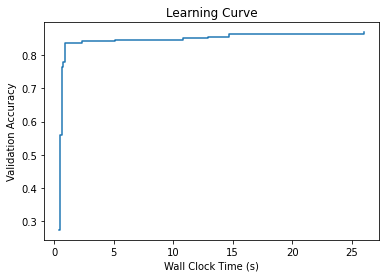

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.title("Learning Curve")
plt.xlabel("Wall Clock Time (s)")
plt.ylabel("Validation Accuracy")
plt.step(time_history, 1 - np.array(best_valid_loss_history), where="post")
plt.show()

In [33]:
prediction = automl.predict(X_test)

In [34]:
np.sqrt(np.mean((prediction - y_test)**2))

0.13330922469250328

# OPTUNA

In [35]:
!pip install optuna

     |████████████████████████████████| 308 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 210 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 113 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 146 kB 2.9 MB/s eta 0:00:01
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=66a18405d8179da3a22c991b50e30bd1b68190294d15057ad863e47120861bc0
  Stored in directory: /home/martin/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [36]:
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import optuna
from sklearn.model_selection import cross_val_score

train = pd.read_csv('../data/train.csv', sep=",")
categorical = [var for var in train.columns if train[var].dtype=='O']

for cat_feat in categorical:
    train[cat_feat] = train[cat_feat].astype('category')
    
y = train['SalePrice']
X = train.drop('SalePrice', axis=1)
y = np.log1p(y)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, random_state=42, test_size=0.2)

def objective(trial):

    x_tr, x_te, y_tr, y_te = \
        train_test_split(X_train, y_train, random_state=42, test_size=0.2)
    
    model = lightgbm.LGBMRegressor()

    param = {
        "objective": "regression",
        "metric": "'neg_mean_squared_error'",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.1, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 1.0, log=True),
        "n_estimators" : trial.suggest_int("n_estimators", 100, 400),
        "num_leaves": trial.suggest_int("num_leaves", 4, 30),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample_freq": trial.suggest_int("subsample_freq",0, 8),
        "colsample_bytree": trial.suggest_float("colsample_bytree",0.5,1.0),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0)
    }
    model.set_params(**param)
    clf = cross_val_score(
    model,
         x_tr, y_tr, scoring = 'neg_mean_squared_error'
    )

    return np.mean(np.sqrt(-clf))

study = optuna.create_study()
study.optimize(objective , n_trials =70)
trial = study.best_trial
model = lightgbm.LGBMRegressor()
model.set_params(**trial.params)
for k,v in trial.params.items():
    print(f'{k}: {v}')
model.fit(X_train, y_train)
print(f'result on hold-out set after HPO: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')

[I 2022-04-28 10:50:07,972] A new study created in memory with name: no-name-89cfb7d5-46e0-4e72-8798-d4371d3c5829


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4


[I 2022-04-28 10:50:08,494] Trial 0 finished with value: 0.13461050785458054 and parameters: {'learning_rate': 0.0626445333008197, 'reg_lambda': 0.0005167418439852972, 'n_estimators': 174, 'num_leaves': 29, 'bagging_freq': 4, 'min_child_samples': 57, 'subsample_freq': 7, 'colsample_bytree': 0.533802541173267, 'subsample': 0.7322648458464427}. Best is trial 0 with value: 0.13461050785458054.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=8 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=8 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=8 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=8 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=8 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:09,534] Trial 1 finished with value: 0.1339262357233636 and parameters: {'learning_rate': 0.03025335997452125, 'reg_lambda': 0.0020301951966907768, 'n_estimators': 199, 'num_leaves': 30, 'bagging_freq': 6, 'min_child_samples': 11, 'subsample_freq': 8, 'colsample_bytree': 0.826270282885486, 'subsample': 0.6446368960542288}. Best is trial 1 with value: 0.1339262357233636.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=7 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=7 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=7 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=7 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=7 will be ignored. Current value: bagging_freq=3


[I 2022-04-28 10:50:10,498] Trial 2 finished with value: 0.13271433247721925 and parameters: {'learning_rate': 0.0969104340158595, 'reg_lambda': 0.0008386543993149321, 'n_estimators': 330, 'num_leaves': 25, 'bagging_freq': 3, 'min_child_samples': 46, 'subsample_freq': 7, 'colsample_bytree': 0.5519081755085138, 'subsample': 0.9474830093512736}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=6 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=6 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=6 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:10,996] Trial 3 finished with value: 0.14766783418950502 and parameters: {'learning_rate': 0.0204342984415749, 'reg_lambda': 2.3123588683494552e-05, 'n_estimators': 225, 'num_leaves': 18, 'bagging_freq': 1, 'min_child_samples': 94, 'subsample_freq': 6, 'colsample_bytree': 0.6929707948190607, 'subsample': 0.9766705613985708}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=6 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=6 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:11,453] Trial 4 finished with value: 0.252321939347829 and parameters: {'learning_rate': 0.003917872234977782, 'reg_lambda': 1.910692176951235e-06, 'n_estimators': 281, 'num_leaves': 12, 'bagging_freq': 1, 'min_child_samples': 80, 'subsample_freq': 1, 'colsample_bytree': 0.9760172813005643, 'subsample': 0.5052135963354876}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=1 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7

[I 2022-04-28 10:50:11,968] Trial 5 finished with value: 0.23302434741665853 and parameters: {'learning_rate': 0.0047464298356568475, 'reg_lambda': 0.02283684275967303, 'n_estimators': 214, 'num_leaves': 28, 'bagging_freq': 7, 'min_child_samples': 63, 'subsample_freq': 2, 'colsample_bytree': 0.7551619703517376, 'subsample': 0.7315024742797556}. Best is trial 2 with value: 0.13271433247721925.



[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4


[I 2022-04-28 10:50:12,960] Trial 6 finished with value: 0.33745141167289444 and parameters: {'learning_rate': 0.0009728671364942086, 'reg_lambda': 1.8935691213759531e-06, 'n_estimators': 200, 'num_leaves': 16, 'bagging_freq': 4, 'min_child_samples': 11, 'subsample_freq': 3, 'colsample_bytree': 0.9483325436040101, 'subsample': 0.9595231388098239}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:13,755] Trial 7 finished with value: 0.3320493289353533 and parameters: {'learning_rate': 0.0008954828624269622, 'reg_lambda': 0.07637961525901081, 'n_estimators': 261, 'num_leaves': 10, 'bagging_freq': 7, 'min_child_samples': 13, 'subsample_freq': 2, 'colsample_bytree': 0.7145312292967583, 'subsample': 0.6067024515056727}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=8 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=8 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=8 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=8 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=8 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:15,492] Trial 8 finished with value: 0.1525268829127271 and parameters: {'learning_rate': 0.006267250781796676, 'reg_lambda': 0.002650522694140983, 'n_estimators': 348, 'num_leaves': 27, 'bagging_freq': 7, 'min_child_samples': 6, 'subsample_freq': 8, 'colsample_bytree': 0.6854603946204186, 'subsample': 0.9530727316988872}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:15,829] Trial 9 finished with value: 0.2509402789380366 and parameters: {'learning_rate': 0.008495500060912882, 'reg_lambda': 0.005234902188554965, 'n_estimators': 110, 'num_leaves': 30, 'bagging_freq': 2, 'min_child_samples': 100, 'subsample_freq': 0, 'colsample_bytree': 0.6150535606737002, 'subsample': 0.8472460557560444}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=5 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=5 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=5 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=5 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=5 will be ignored. Current value: bagging_freq=5


[I 2022-04-28 10:50:16,600] Trial 10 finished with value: 0.3764874932343056 and parameters: {'learning_rate': 0.00012195485709320138, 'reg_lambda': 0.7604762740736989, 'n_estimators': 400, 'num_leaves': 4, 'bagging_freq': 5, 'min_child_samples': 36, 'subsample_freq': 5, 'colsample_bytree': 0.5120692884552408, 'subsample': 0.8512129156666413}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=8 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=8 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=8 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=8 will be ignored. Current value: bagging_freq=5


[I 2022-04-28 10:50:17,473] Trial 11 finished with value: 0.13652187610640754 and parameters: {'learning_rate': 0.0782662291172844, 'reg_lambda': 2.0362772377747758e-08, 'n_estimators': 309, 'num_leaves': 22, 'bagging_freq': 5, 'min_child_samples': 35, 'subsample_freq': 8, 'colsample_bytree': 0.8407909293177894, 'subsample': 0.6359015172527513}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=8 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=5 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=5 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=5 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=5 will be ignored. Current value: bagging_freq=3


[I 2022-04-28 10:50:18,055] Trial 12 finished with value: 0.13803732119161635 and parameters: {'learning_rate': 0.0330191373765353, 'reg_lambda': 7.646416227314871e-05, 'n_estimators': 146, 'num_leaves': 23, 'bagging_freq': 3, 'min_child_samples': 34, 'subsample_freq': 5, 'colsample_bytree': 0.8848391751078709, 'subsample': 0.635203605424622}. Best is trial 2 with value: 0.13271433247721925.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=5 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=7 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=7 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=7 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=7 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=7 will be ignored. Current value: bagging_freq=5


[I 2022-04-28 10:50:19,399] Trial 13 finished with value: 0.13018254490965397 and parameters: {'learning_rate': 0.02035623039241466, 'reg_lambda': 0.0004975322700869825, 'n_estimators': 333, 'num_leaves': 24, 'bagging_freq': 5, 'min_child_samples': 23, 'subsample_freq': 7, 'colsample_bytree': 0.7948052391570827, 'subsample': 0.8206818403464098}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=6 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=6 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=6 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=6 will be ignored. Current value: bagging_freq=3


[I 2022-04-28 10:50:20,363] Trial 14 finished with value: 0.13520325440896955 and parameters: {'learning_rate': 0.01469362487021236, 'reg_lambda': 1.0373936914570905e-05, 'n_estimators': 344, 'num_leaves': 23, 'bagging_freq': 3, 'min_child_samples': 45, 'subsample_freq': 6, 'colsample_bytree': 0.6140570251768419, 'subsample': 0.8518685564873979}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=6 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3


[I 2022-04-28 10:50:21,828] Trial 15 finished with value: 0.13429017746487332 and parameters: {'learning_rate': 0.08391830974592686, 'reg_lambda': 0.00027459974397538075, 'n_estimators': 397, 'num_leaves': 19, 'bagging_freq': 3, 'min_child_samples': 26, 'subsample_freq': 4, 'colsample_bytree': 0.8054767809861506, 'subsample': 0.8096417595063896}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5


[I 2022-04-28 10:50:22,581] Trial 16 finished with value: 0.28351545831771074 and parameters: {'learning_rate': 0.0016510668668564274, 'reg_lambda': 1.250550128096383e-08, 'n_estimators': 328, 'num_leaves': 25, 'bagging_freq': 5, 'min_child_samples': 66, 'subsample_freq': 6, 'colsample_bytree': 0.6094196056354062, 'subsample': 0.9037891509163969}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=7 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=7 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=7 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=7 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=7 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:23,854] Trial 17 finished with value: 0.1306708056406348 and parameters: {'learning_rate': 0.04751020549489045, 'reg_lambda': 0.10539186349238844, 'n_estimators': 290, 'num_leaves': 20, 'bagging_freq': 2, 'min_child_samples': 22, 'subsample_freq': 7, 'colsample_bytree': 0.775328275851668, 'subsample': 0.9062541098996595}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:24,949] Trial 18 finished with value: 0.13617413076371315 and parameters: {'learning_rate': 0.012426823034133866, 'reg_lambda': 0.511300491308945, 'n_estimators': 288, 'num_leaves': 14, 'bagging_freq': 2, 'min_child_samples': 22, 'subsample_freq': 4, 'colsample_bytree': 0.9035973553111036, 'subsample': 0.7808314953351884}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=7 will be ignored. Current value: bagging_freq=4


[I 2022-04-28 10:50:26,369] Trial 19 finished with value: 0.3675096100417765 and parameters: {'learning_rate': 0.00018838728996601437, 'reg_lambda': 0.05214089529715269, 'n_estimators': 372, 'num_leaves': 21, 'bagging_freq': 4, 'min_child_samples': 22, 'subsample_freq': 7, 'colsample_bytree': 0.763377099330968, 'subsample': 0.8804856366062855}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:27,264] Trial 20 finished with value: 0.1311222572140287 and parameters: {'learning_rate': 0.04444397054154442, 'reg_lambda': 2.2883198118259204e-07, 'n_estimators': 251, 'num_leaves': 8, 'bagging_freq': 6, 'min_child_samples': 28, 'subsample_freq': 5, 'colsample_bytree': 0.8809316833487199, 'subsample': 0.7756156183429876}. Best is trial 13 with value: 0.13018254490965397.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:27,962] Trial 21 finished with value: 0.12927329694863 and parameters: {'learning_rate': 0.038234946883278324, 'reg_lambda': 1.5376313679381812e-07, 'n_estimators': 254, 'num_leaves': 7, 'bagging_freq': 6, 'min_child_samples': 23, 'subsample_freq': 5, 'colsample_bytree': 0.8570600131396184, 'subsample': 0.7864175917711234}. Best is trial 21 with value: 0.12927329694863.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=7 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=7 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=7 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=7 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:28,525] Trial 22 finished with value: 0.13300844569509693 and parameters: {'learning_rate': 0.025294559393077242, 'reg_lambda': 2.0081954489528075e-07, 'n_estimators': 280, 'num_leaves': 4, 'bagging_freq': 6, 'min_child_samples': 18, 'subsample_freq': 7, 'colsample_bytree': 0.7858276353367357, 'subsample': 0.7105229769782749}. Best is trial 21 with value: 0.12927329694863.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=7 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=6 will be ignored. Current value: bagging_freq=5


[I 2022-04-28 10:50:29,509] Trial 23 finished with value: 0.13986765220678285 and parameters: {'learning_rate': 0.01267088898916747, 'reg_lambda': 0.01812627241138135, 'n_estimators': 306, 'num_leaves': 16, 'bagging_freq': 5, 'min_child_samples': 43, 'subsample_freq': 6, 'colsample_bytree': 0.8472013292494861, 'subsample': 0.9028011357020702}. Best is trial 21 with value: 0.12927329694863.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=5 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:30,779] Trial 24 finished with value: 0.1348251062492379 and parameters: {'learning_rate': 0.039815732103913495, 'reg_lambda': 6.175507343598935e-05, 'n_estimators': 241, 'num_leaves': 20, 'bagging_freq': 6, 'min_child_samples': 5, 'subsample_freq': 5, 'colsample_bytree': 0.921776351761496, 'subsample': 0.8138193895844769}. Best is trial 21 with value: 0.12927329694863.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:31,636] Trial 25 finished with value: 0.12803654639380244 and parameters: {'learning_rate': 0.05105335384749994, 'reg_lambda': 0.2366688920711734, 'n_estimators': 363, 'num_leaves': 7, 'bagging_freq': 2, 'min_child_samples': 29, 'subsample_freq': 3, 'colsample_bytree': 0.7245583523060263, 'subsample': 0.697251655360092}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4


[I 2022-04-28 10:50:32,467] Trial 26 finished with value: 0.130217696537926 and parameters: {'learning_rate': 0.020582880513233415, 'reg_lambda': 4.290878730758029e-06, 'n_estimators': 375, 'num_leaves': 7, 'bagging_freq': 4, 'min_child_samples': 32, 'subsample_freq': 3, 'colsample_bytree': 0.7205913527867214, 'subsample': 0.6804583342598886}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5


[I 2022-04-28 10:50:33,170] Trial 27 finished with value: 0.26638428238327755 and parameters: {'learning_rate': 0.0019209049266737705, 'reg_lambda': 2.756496378412226e-07, 'n_estimators': 363, 'num_leaves': 7, 'bagging_freq': 5, 'min_child_samples': 50, 'subsample_freq': 3, 'colsample_bytree': 0.6553124734199719, 'subsample': 0.5806372719713966}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=4 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=4 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=4 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=4 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=4 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:33,985] Trial 28 finished with value: 0.14879632304065932 and parameters: {'learning_rate': 0.009469811453315538, 'reg_lambda': 4.9829803742996784e-08, 'n_estimators': 319, 'num_leaves': 11, 'bagging_freq': 6, 'min_child_samples': 40, 'subsample_freq': 4, 'colsample_bytree': 0.7343459759554514, 'subsample': 0.6920049990235538}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=2 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=2 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=2 will be ignored. Current value: bagging_freq=4


[I 2022-04-28 10:50:34,529] Trial 29 finished with value: 0.13744136087486267 and parameters: {'learning_rate': 0.055303639472057395, 'reg_lambda': 0.00021069929768621957, 'n_estimators': 159, 'num_leaves': 13, 'bagging_freq': 4, 'min_child_samples': 55, 'subsample_freq': 2, 'colsample_bytree': 0.8065471493292253, 'subsample': 0.7605529745226043}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=2 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=2 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5


[I 2022-04-28 10:50:35,312] Trial 30 finished with value: 0.13110816304753717 and parameters: {'learning_rate': 0.018566668479067235, 'reg_lambda': 0.00852418120761555, 'n_estimators': 347, 'num_leaves': 6, 'bagging_freq': 5, 'min_child_samples': 15, 'subsample_freq': 3, 'colsample_bytree': 0.6557560065142184, 'subsample': 0.7379652593138921}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=3 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=3 will be ignored. Current value: bagging_freq=4


[I 2022-04-28 10:50:36,253] Trial 31 finished with value: 0.13026035186229284 and parameters: {'learning_rate': 0.02603525069595285, 'reg_lambda': 2.6738806500774292e-06, 'n_estimators': 378, 'num_leaves': 9, 'bagging_freq': 4, 'min_child_samples': 31, 'subsample_freq': 3, 'colsample_bytree': 0.7376829823187182, 'subsample': 0.681570919143527}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:37,106] Trial 32 finished with value: 0.12988629133274376 and parameters: {'learning_rate': 0.05410075576115179, 'reg_lambda': 9.79678036397382e-06, 'n_estimators': 385, 'num_leaves': 6, 'bagging_freq': 6, 'min_child_samples': 27, 'subsample_freq': 1, 'colsample_bytree': 0.8441721492119204, 'subsample': 0.8105434629866073}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:37,906] Trial 33 finished with value: 0.1290959541024816 and parameters: {'learning_rate': 0.06228341498845603, 'reg_lambda': 0.0009879829638964734, 'n_estimators': 390, 'num_leaves': 5, 'bagging_freq': 6, 'min_child_samples': 25, 'subsample_freq': 1, 'colsample_bytree': 0.8629799784961831, 'subsample': 0.8065408437510568}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:38,664] Trial 34 finished with value: 0.12885394129937014 and parameters: {'learning_rate': 0.0676661453553806, 'reg_lambda': 6.689725352014924e-07, 'n_estimators': 384, 'num_leaves': 5, 'bagging_freq': 7, 'min_child_samples': 17, 'subsample_freq': 0, 'colsample_bytree': 0.8575459396835027, 'subsample': 0.7956030924386176}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:39,383] Trial 35 finished with value: 0.12944791913584588 and parameters: {'learning_rate': 0.06957452202299753, 'reg_lambda': 6.374458438580713e-07, 'n_estimators': 357, 'num_leaves': 5, 'bagging_freq': 7, 'min_child_samples': 18, 'subsample_freq': 0, 'colsample_bytree': 0.8754379530687169, 'subsample': 0.787201110361871}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:40,399] Trial 36 finished with value: 0.13692560025761624 and parameters: {'learning_rate': 0.09490659708536335, 'reg_lambda': 6.305812375478503e-08, 'n_estimators': 387, 'num_leaves': 9, 'bagging_freq': 7, 'min_child_samples': 39, 'subsample_freq': 1, 'colsample_bytree': 0.968073977835329, 'subsample': 0.7238393215301576}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:40,823] Trial 37 finished with value: 0.139510822575434 and parameters: {'learning_rate': 0.03713534904411378, 'reg_lambda': 0.001069320954939506, 'n_estimators': 183, 'num_leaves': 4, 'bagging_freq': 1, 'min_child_samples': 62, 'subsample_freq': 0, 'colsample_bytree': 0.8250885677333716, 'subsample': 0.7644327367557957}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=1 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:41,996] Trial 38 finished with value: 0.13357166488556638 and parameters: {'learning_rate': 0.09954375502565119, 'reg_lambda': 0.20869372737061553, 'n_estimators': 364, 'num_leaves': 11, 'bagging_freq': 6, 'min_child_samples': 9, 'subsample_freq': 1, 'colsample_bytree': 0.9276784091069605, 'subsample': 0.5593514381131861}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:42,741] Trial 39 finished with value: 0.13166235343587326 and parameters: {'learning_rate': 0.058934624200155765, 'reg_lambda': 4.092614776642928e-05, 'n_estimators': 268, 'num_leaves': 8, 'bagging_freq': 7, 'min_child_samples': 14, 'subsample_freq': 2, 'colsample_bytree': 0.8692456936887888, 'subsample': 0.6593419034301986}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=2 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:43,330] Trial 40 finished with value: 0.3584661125483583 and parameters: {'learning_rate': 0.0005471892334988537, 'reg_lambda': 7.60612281336593e-08, 'n_estimators': 222, 'num_leaves': 6, 'bagging_freq': 7, 'min_child_samples': 49, 'subsample_freq': 1, 'colsample_bytree': 0.9966424974725732, 'subsample': 0.743526164953341}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:44,062] Trial 41 finished with value: 0.12984545099289238 and parameters: {'learning_rate': 0.0693263246442204, 'reg_lambda': 6.147885929188964e-07, 'n_estimators': 362, 'num_leaves': 5, 'bagging_freq': 7, 'min_child_samples': 18, 'subsample_freq': 0, 'colsample_bytree': 0.8638651198265898, 'subsample': 0.7822766397130615}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:44,789] Trial 42 finished with value: 0.12873475134769274 and parameters: {'learning_rate': 0.03497109289695319, 'reg_lambda': 8.576103726792883e-07, 'n_estimators': 348, 'num_leaves': 5, 'bagging_freq': 7, 'min_child_samples': 18, 'subsample_freq': 0, 'colsample_bytree': 0.8966092587638878, 'subsample': 0.7957301426219371}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2022-04-28 10:50:45,873] Trial 43 finished with value: 0.13017615511135774 and parameters: {'learning_rate': 0.030878849526700683, 'reg_lambda': 5.041875199990072e-07, 'n_estimators': 399, 'num_leaves': 8, 'bagging_freq': 6, 'min_child_samples': 10, 'subsample_freq': 0, 'colsample_bytree': 0.9430382189714875, 'subsample': 0.8366653737702645}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:46,911] Trial 44 finished with value: 0.12913893811045601 and parameters: {'learning_rate': 0.038254772631148626, 'reg_lambda': 1.3635592835127698e-06, 'n_estimators': 339, 'num_leaves': 10, 'bagging_freq': 7, 'min_child_samples': 29, 'subsample_freq': 0, 'colsample_bytree': 0.9111500060715376, 'subsample': 0.8696608996375539}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:47,580] Trial 45 finished with value: 0.1821315789803203 and parameters: {'learning_rate': 0.005710256603640508, 'reg_lambda': 1.2628728420816323e-06, 'n_estimators': 344, 'num_leaves': 10, 'bagging_freq': 7, 'min_child_samples': 81, 'subsample_freq': 0, 'colsample_bytree': 0.9119822564389275, 'subsample': 0.8761796195915835}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:48,298] Trial 46 finished with value: 0.1296335604039825 and parameters: {'learning_rate': 0.027196390257353632, 'reg_lambda': 1.44775749135153e-05, 'n_estimators': 331, 'num_leaves': 5, 'bagging_freq': 7, 'min_child_samples': 30, 'subsample_freq': 1, 'colsample_bytree': 0.9002375182968161, 'subsample': 0.9321377668671409}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:49,513] Trial 47 finished with value: 0.13461813313471976 and parameters: {'learning_rate': 0.016306593579020697, 'reg_lambda': 3.831107360702659e-06, 'n_estimators': 311, 'num_leaves': 13, 'bagging_freq': 7, 'min_child_samples': 39, 'subsample_freq': 1, 'colsample_bytree': 0.946425278107141, 'subsample': 0.8713815469422492}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=1 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2022-04-28 10:50:50,753] Trial 48 finished with value: 0.21098309110811297 and parameters: {'learning_rate': 0.002995562073070344, 'reg_lambda': 1.28581225033313e-06, 'n_estimators': 386, 'num_leaves': 9, 'bagging_freq': 7, 'min_child_samples': 17, 'subsample_freq': 0, 'colsample_bytree': 0.97021030172237, 'subsample': 0.8329868622969597}. Best is trial 25 with value: 0.12803654639380244.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:51,389] Trial 49 finished with value: 0.12714589615503563 and parameters: {'learning_rate': 0.06968781875044947, 'reg_lambda': 3.059701474194842e-05, 'n_estimators': 352, 'num_leaves': 4, 'bagging_freq': 2, 'min_child_samples': 11, 'subsample_freq': 2, 'colsample_bytree': 0.8261119844531706, 'subsample': 0.9997983004687256}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:52,146] Trial 50 finished with value: 0.12952978733145115 and parameters: {'learning_rate': 0.06907034863164298, 'reg_lambda': 0.0015385680591039979, 'n_estimators': 355, 'num_leaves': 5, 'bagging_freq': 2, 'min_child_samples': 10, 'subsample_freq': 2, 'colsample_bytree': 0.8078098083270701, 'subsample': 0.9907525899455557}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=1 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=1 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=1 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=1 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:52,792] Trial 51 finished with value: 0.12867448676728138 and parameters: {'learning_rate': 0.0504621507393891, 'reg_lambda': 2.759949211506593e-05, 'n_estimators': 335, 'num_leaves': 4, 'bagging_freq': 2, 'min_child_samples': 25, 'subsample_freq': 1, 'colsample_bytree': 0.8266739859853524, 'subsample': 0.7069438807041056}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=1 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:53,483] Trial 52 finished with value: 0.130169222435396 and parameters: {'learning_rate': 0.047493151246566, 'reg_lambda': 0.00018518307398070734, 'n_estimators': 373, 'num_leaves': 4, 'bagging_freq': 2, 'min_child_samples': 7, 'subsample_freq': 2, 'colsample_bytree': 0.8291381736074221, 'subsample': 0.6996018719186162}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:54,167] Trial 53 finished with value: 0.1282122355409955 and parameters: {'learning_rate': 0.07623473089321019, 'reg_lambda': 1.8294174043783964e-05, 'n_estimators': 317, 'num_leaves': 6, 'bagging_freq': 1, 'min_child_samples': 13, 'subsample_freq': 2, 'colsample_bytree': 0.8260071374480745, 'subsample': 0.7188120923350609}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:54,841] Trial 54 finished with value: 0.1275127577690041 and parameters: {'learning_rate': 0.08111522551285662, 'reg_lambda': 2.9806169641057758e-05, 'n_estimators': 300, 'num_leaves': 6, 'bagging_freq': 1, 'min_child_samples': 12, 'subsample_freq': 2, 'colsample_bytree': 0.7628740462029133, 'subsample': 0.6581640062256955}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:55,606] Trial 55 finished with value: 0.12891732968704503 and parameters: {'learning_rate': 0.048623723446338335, 'reg_lambda': 3.179738138333745e-05, 'n_estimators': 297, 'num_leaves': 7, 'bagging_freq': 1, 'min_child_samples': 14, 'subsample_freq': 2, 'colsample_bytree': 0.7005946898202658, 'subsample': 0.6139036402440907}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:56,386] Trial 56 finished with value: 0.12872991636374093 and parameters: {'learning_rate': 0.08278174139933792, 'reg_lambda': 0.00012051542256817191, 'n_estimators': 324, 'num_leaves': 6, 'bagging_freq': 1, 'min_child_samples': 12, 'subsample_freq': 3, 'colsample_bytree': 0.7804921696625587, 'subsample': 0.6585210829929992}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:57,121] Trial 57 finished with value: 0.12879935949702823 and parameters: {'learning_rate': 0.08484757740055268, 'reg_lambda': 9.571840916413849e-05, 'n_estimators': 320, 'num_leaves': 6, 'bagging_freq': 1, 'min_child_samples': 12, 'subsample_freq': 3, 'colsample_bytree': 0.7555274136024329, 'subsample': 0.6447664606470067}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=3 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:57,737] Trial 58 finished with value: 0.13046977204654583 and parameters: {'learning_rate': 0.09896878227133091, 'reg_lambda': 0.00040363825980158265, 'n_estimators': 325, 'num_leaves': 4, 'bagging_freq': 1, 'min_child_samples': 7, 'subsample_freq': 2, 'colsample_bytree': 0.7847446867389453, 'subsample': 0.663126413063887}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:50:58,619] Trial 59 finished with value: 0.13038236599137315 and parameters: {'learning_rate': 0.02389556664259304, 'reg_lambda': 1.6166792066440618e-05, 'n_estimators': 301, 'num_leaves': 8, 'bagging_freq': 2, 'min_child_samples': 5, 'subsample_freq': 3, 'colsample_bytree': 0.7689751800908148, 'subsample': 0.7176353118436246}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1


[I 2022-04-28 10:50:59,758] Trial 60 finished with value: 0.13270455435227205 and parameters: {'learning_rate': 0.07809157753350215, 'reg_lambda': 6.148925353721036e-06, 'n_estimators': 335, 'num_leaves': 16, 'bagging_freq': 1, 'min_child_samples': 20, 'subsample_freq': 2, 'colsample_bytree': 0.6784673611602494, 'subsample': 0.6000476389821583}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=2 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3


[I 2022-04-28 10:51:00,538] Trial 61 finished with value: 0.1299146183208349 and parameters: {'learning_rate': 0.032517604687180596, 'reg_lambda': 2.5829087907977965e-05, 'n_estimators': 315, 'num_leaves': 6, 'bagging_freq': 3, 'min_child_samples': 12, 'subsample_freq': 4, 'colsample_bytree': 0.8185819511874587, 'subsample': 0.6713573692695781}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=4 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:51:01,339] Trial 62 finished with value: 0.12774667062348505 and parameters: {'learning_rate': 0.052249264081261224, 'reg_lambda': 0.0001315383741263806, 'n_estimators': 280, 'num_leaves': 7, 'bagging_freq': 2, 'min_child_samples': 25, 'subsample_freq': 3, 'colsample_bytree': 0.7384738261433655, 'subsample': 0.7028880988943429}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:51:02,133] Trial 63 finished with value: 0.1282775361799025 and parameters: {'learning_rate': 0.04958812912661401, 'reg_lambda': 0.00017192106790929083, 'n_estimators': 277, 'num_leaves': 7, 'bagging_freq': 2, 'min_child_samples': 24, 'subsample_freq': 3, 'colsample_bytree': 0.74376028508044, 'subsample': 0.7089539727153585}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:51:02,896] Trial 64 finished with value: 0.12915734839661328 and parameters: {'learning_rate': 0.04678413784249598, 'reg_lambda': 5.4000367549550364e-05, 'n_estimators': 274, 'num_leaves': 7, 'bagging_freq': 2, 'min_child_samples': 24, 'subsample_freq': 3, 'colsample_bytree': 0.7402825645915421, 'subsample': 0.7079121042812418}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:51:03,610] Trial 65 finished with value: 0.13093284760823282 and parameters: {'learning_rate': 0.05991252287897286, 'reg_lambda': 0.003522573073998633, 'n_estimators': 237, 'num_leaves': 8, 'bagging_freq': 2, 'min_child_samples': 35, 'subsample_freq': 4, 'colsample_bytree': 0.7203450096942166, 'subsample': 0.7304259970419928}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3


[I 2022-04-28 10:51:04,227] Trial 66 finished with value: 0.16596744807695352 and parameters: {'learning_rate': 0.009621509967361963, 'reg_lambda': 0.00013593920506461033, 'n_estimators': 287, 'num_leaves': 4, 'bagging_freq': 3, 'min_child_samples': 21, 'subsample_freq': 2, 'colsample_bytree': 0.6699111084035073, 'subsample': 0.7522361873200258}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:51:05,138] Trial 67 finished with value: 0.36505673060915644 and parameters: {'learning_rate': 0.0003169750891312366, 'reg_lambda': 6.454380895563993e-06, 'n_estimators': 260, 'num_leaves': 27, 'bagging_freq': 2, 'min_child_samples': 26, 'subsample_freq': 3, 'colsample_bytree': 0.7028793550407528, 'subsample': 0.6883676634075273}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=3 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3


[I 2022-04-28 10:51:06,027] Trial 68 finished with value: 0.1315492527702964 and parameters: {'learning_rate': 0.0509735466476325, 'reg_lambda': 0.0003357320739963269, 'n_estimators': 296, 'num_leaves': 11, 'bagging_freq': 3, 'min_child_samples': 34, 'subsample_freq': 2, 'colsample_bytree': 0.7500168367153767, 'subsample': 0.6279334351925797}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=2 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2


[I 2022-04-28 10:51:06,778] Trial 69 finished with value: 0.13156965654286645 and parameters: {'learning_rate': 0.021749984126173332, 'reg_lambda': 1.624048105967676e-05, 'n_estimators': 268, 'num_leaves': 7, 'bagging_freq': 2, 'min_child_samples': 20, 'subsample_freq': 4, 'colsample_bytree': 0.7943679638086144, 'subsample': 0.7024634979390891}. Best is trial 49 with value: 0.12714589615503563.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=4 will be ignored. Current value: bagging_freq=2
learning_rate: 0.06968781875044947
reg_lambda: 3.059701474194842e-05
n_estimators: 352
num_leaves: 4
bagging_freq: 2
min_child_samples: 11
subsample_freq: 2
colsample_bytree: 0.8261119844531706
subsample: 0.9997983004687256
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=2 will be ignored. Current value: bagging_freq=2
result on hold-out set after HPO: 0.12846352820280627
